In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [131]:
data = pd.read_csv("data/winequality-red.csv", sep=";",header = 0, index_col = None,)

In [132]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [133]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [134]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [277]:
# split into explanatory and response variables 
X = data.iloc[:,:]#X = data.iloc[:,0:10]
X = X.drop(columns=['alcohol']) #X = np.concatenate((X,data.iloc[:,11:11]),axis=1)
Y = data.iloc[:,10]

# build and fit model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

# output model
print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

# compute predicted values
Y_pred = reg.predict(X)

# compute error statistics
mse = mean_squared_error(Y, Y_pred)
r2s = r2_score(Y, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

Coefficients: [ 4.92480135e-01  5.89326148e-01  8.19747153e-01  2.62376361e-01
 -9.32957057e-01 -3.01862518e-03 -1.39044150e-03 -5.73634089e+02
  3.61704316e+00  9.54032683e-01  2.32220722e-01]
Intercept: 563.1752856683473
MSE =  0.3504083232624891
R2s =  0.6912531089251446


In [278]:
# merge observed and predicted values and compute residuals
df2 = pd.concat([Y, pd.Series(Y_pred), pd.Series(Y-Y_pred)], axis=1)
df2.columns=['observed','predicted','residual']
print(df2.head())
print(df2.tail())

   observed  predicted  residual
0       9.4   9.598387 -0.198387
1       9.8   9.543285  0.256715
2       9.8   9.554177  0.245823
3       9.8  10.498632 -0.698632
4       9.4   9.598387 -0.198387
      observed  predicted  residual
1594      10.5  10.415535  0.084465
1595      11.2  10.833395  0.366605
1596      11.0  10.363166  0.636834
1597      10.2  10.572193 -0.372193
1598      11.0  10.705215  0.294785


<Figure size 432x288 with 0 Axes>

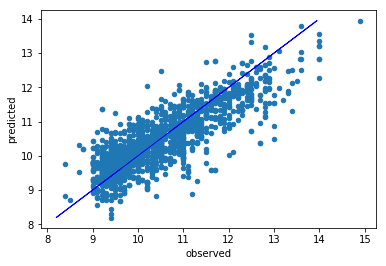

In [279]:
# plot observed vs predicted values
plt.figure()
df2.plot.scatter(x='observed', y='predicted')
plt.plot(Y_pred, Y_pred, color='blue', linewidth=1)
plt.show()

<Figure size 432x288 with 0 Axes>

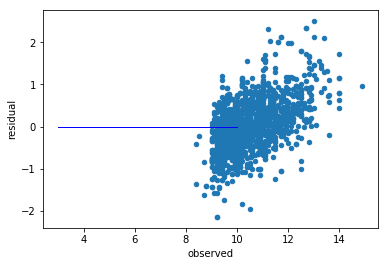

In [280]:
plt.figure()
df2.plot.scatter(x='observed', y='residual')
plt.plot([3,10], [0,0], color='blue', linewidth=1)
plt.show()

In [281]:
# normalize variables and rerun MLR analysis to
# estimate variable importance.
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(data))
print(dfn)
Xn = data.iloc[:,0:11]
Yn = data.iloc[:,11]
reg2 = linear_model.LinearRegression()
reg2.fit(Xn,Yn)
print("Standardized variables...")
print("Coefficients:" ,reg2.coef_)
print("Intercept:", reg2.intercept_)


            0         1         2         3         4         5         6   \
0    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
1    -0.298547  1.967442 -1.391472  0.043416  0.223875  0.872638  0.624363   
2    -0.298547  1.297065 -1.186070 -0.169427  0.096353 -0.083669  0.229047   
3     1.654856 -1.384443  1.484154 -0.453218 -0.264960  0.107592  0.411500   
4    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
5    -0.528360  0.738418 -1.391472 -0.524166 -0.264960 -0.274931 -0.196679   
6    -0.241094  0.403229 -1.083370 -0.666062 -0.392483 -0.083669  0.381091   
7    -0.585813  0.682553 -1.391472 -0.949853 -0.477498 -0.083669 -0.774449   
8    -0.298547  0.291499 -1.288771 -0.382271 -0.307468 -0.657454 -0.865676   
9    -0.470907 -0.155419  0.457144  2.526589 -0.349975  0.107592  1.688677   
10   -0.930531  0.291499 -0.980669 -0.524166  0.202621 -0.083669  0.563545   
11   -0.470907 -0.155419  0.457144  2.526589 -0.349975  0.107592

C:\anaconda\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda\envs\py36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
